In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [56]:
df = pd.read_csv('/kaggle/input/car-data-analysis/CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [36]:
df.shape

(4340, 8)

In [37]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [38]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

***This table shows total entries of cars of each brand in the list.***

# ***Data Cleaning*** 

In [41]:
# To check whether there is any null value in the dataset.
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
name_2           0
dtype: int64

***Since there is no null value in any row or column.***

In [42]:
# To remove duplicate/repeated rows:
df.drop_duplicates(inplace=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,name_2
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


***Rows reduced 4340 to 3577.***

# ***Data Preprocessing*** 

In [43]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,name_2
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [44]:
# One Hot Encoding
pd.get_dummies(df, columns=['seller_type'])

,name,year,selling_price,km_driven,fuel,transmission,owner,name_2,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti 800 AC,2007,60000,70000,Petrol,Manual,First Owner,Maruti,False,True,False
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Manual,First Owner,Maruti,False,True,False
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Manual,First Owner,Hyundai,False,True,False
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Manual,First Owner,Datsun,False,True,False
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Manual,Second Owner,Honda,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Manual,Second Owner,Hyundai,False,True,False
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Manual,Second Owner,Hyundai,False,True,False
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Manual,Second Owner,Maruti,False,True,False
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Manual,First Owner,Hyundai,False,True,False


In [45]:
df.year.value_counts()

year
2017    346
2012    338
2015    332
2014    321
2013    298
2018    295
2016    283
2011    247
2010    210
2009    169
2019    162
2008    129
2007    117
2006     93
2005     61
2020     45
2004     38
2003     22
2002     18
2001     16
2000     12
1998      9
1999      9
1997      3
1996      2
1995      1
1992      1
Name: count, dtype: int64

***This table shows that how many cars are sold in the following year.***

In [51]:
# To find Standardisation between 'km_driven' and 'selling_price'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['selling_price', 'km_driven']] = scaler.fit_transform(df[['selling_price', 'km_driven']])
df[['selling_price', 'km_driven']]

,selling_price,km_driven
0,-0.812819,0.015754
1,-0.665538,-0.404650
2,0.247604,0.646360
3,-0.439708,-0.488731
4,-0.046958,1.508188
...,...,...
4335,-0.125510,0.225956
4336,-0.125510,0.225956
4337,-0.714632,0.289016
4338,0.767997,0.436158


In [52]:
# Normalisation between 'selling_price' and 'km_driven':
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['selling_price', 'km_driven']] = scaler.fit_transform(df[['selling_price', 'km_driven']])
df[['selling_price', 'km_driven']]

,selling_price,km_driven
0,0.004505,0.086783
1,0.012950,0.061988
2,0.065315,0.123976
3,0.025901,0.057028
4,0.048423,0.174807
...,...,...
4335,0.043919,0.099181
4336,0.043919,0.099181
4337,0.010135,0.102900
4338,0.095158,0.111579


# ***Data Visualisation:***

In [57]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [59]:
df["name_2"] = df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
df['name_2']

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: name_2, Length: 4340, dtype: object

In [111]:
df.name.value_counts()

name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64

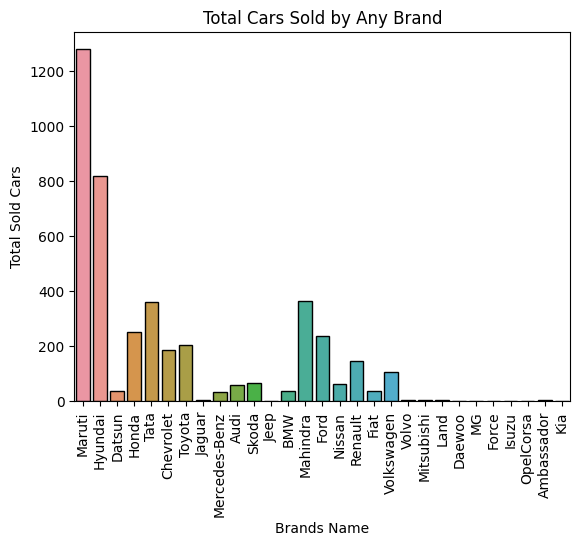

In [153]:
sns.countplot(data = df, x = "name_2", edgecolor = 'black')
plt.xticks(rotation = 90)
plt.xlabel("Brands Name", color = "black")
plt.ylabel("Total Sold Cars", color = "black")
plt.title("Total Cars Sold by Any Brand", color = "black")
plt.show()

***This is the visual representation that shows that which brand sold the most of it's cars.***

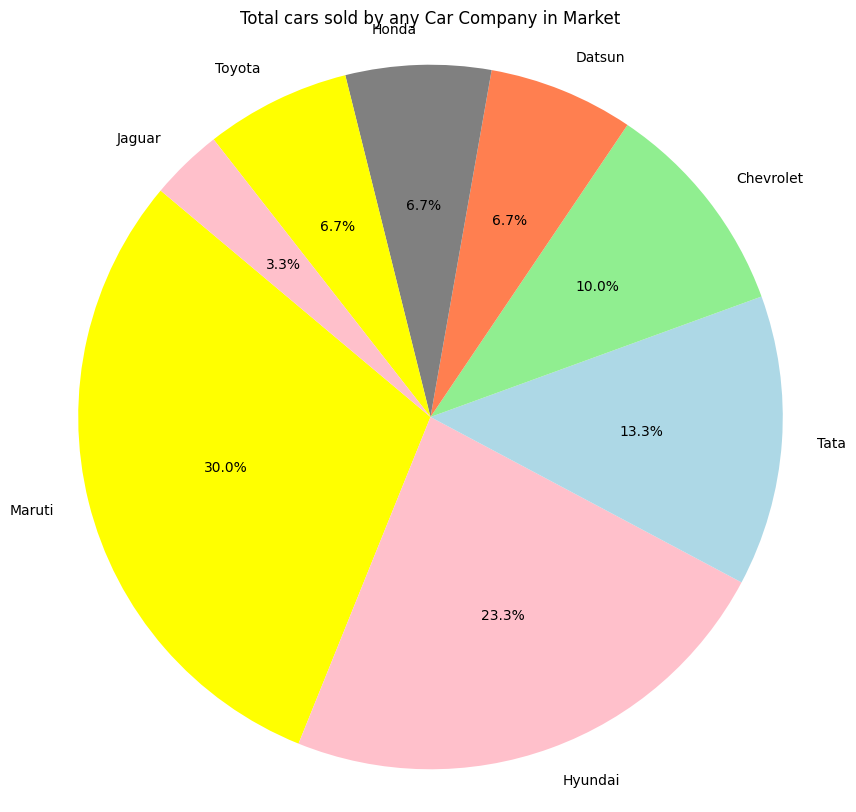

In [151]:
labels = df["name_2"][:30].value_counts().index
sizes = df["name_2"][:30].value_counts()
colors = ['yellow','pink','lightblue','lightgreen',"coral","grey"]
plt.figure(figsize = (10,10))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',colors = colors, startangle = 140)
plt.title('Total cars sold by any Car Company in Market')
plt.axis('equal')
plt.show()

***This is the visual representation that shows that which car brand occupy the most of the car market.***

(-1.099999004818039,
 1.0999998660556929,
 -1.0999890722402392,
 1.0999994796304875)

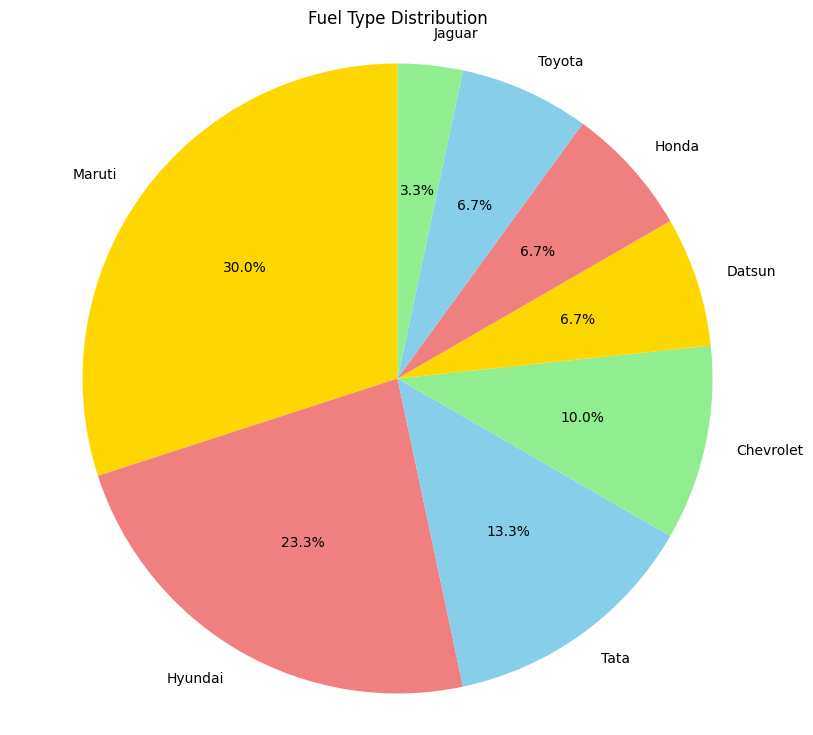

In [152]:
colors = ['gold', 'lightcoral', 'skyblue', 'lightgreen']
plt.figure(figsize = (10,9))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 90, 
        colors = colors)
plt.title("Fuel Type Distribution")
plt.axis('equal')  

***This graph shows the fuel type distribution of cars on any brand on the basis of diesel in a market.***

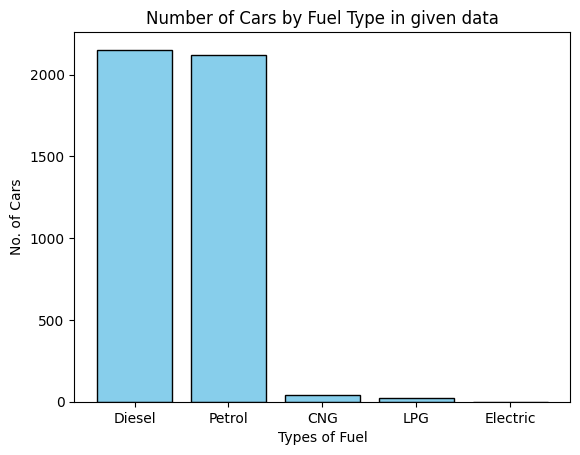

In [127]:
fuel_counts = df['fuel'].value_counts()
plt.bar(fuel_counts.index, fuel_counts.values, color = 'skyblue', edgecolor = 'black')
#plt.figure(figsize = (8,8))
plt.title("Number of Cars by Fuel Type in given data")
plt.xlabel("Types of Fuel")
plt.ylabel("No. of Cars")
plt.show()

***Same as above pie chart, this bar plot shows how many cars are given in dataset lie in which fuel type.***

Text(0, 0.5, 'Owner Type')

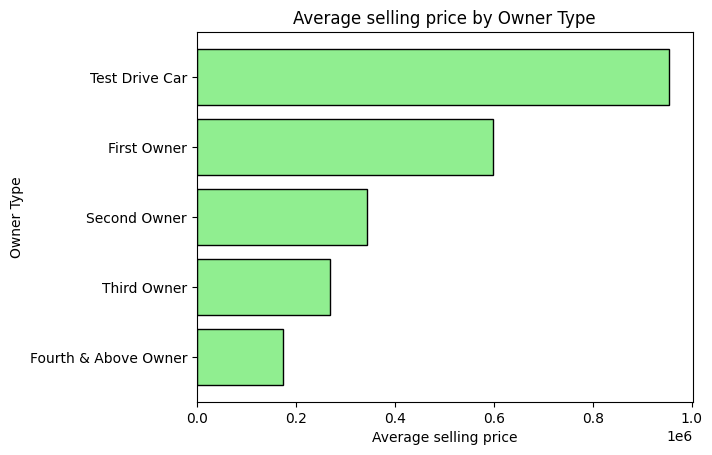

In [132]:
avg_price_by_owner = df.groupby('owner')['selling_price'].mean().sort_values()
plt.barh(avg_price_by_owner.index, avg_price_by_owner.values, color = 'lightgreen', edgecolor = 'black')
plt.title("Average selling price by Owner Type")
plt.xlabel("Average selling price")
plt.ylabel("Owner Type")

***This horizontal bar graph shows the types of owners on the basis of selling price.***

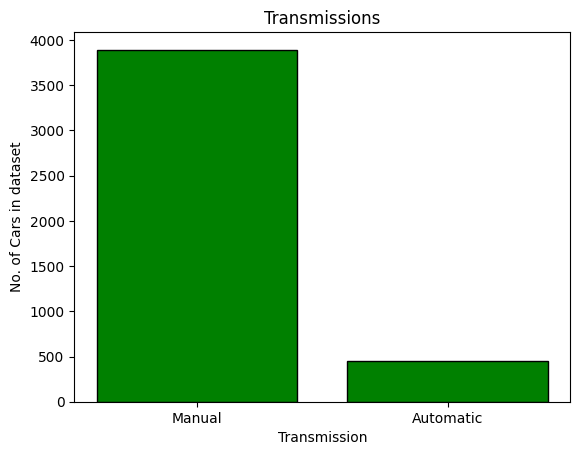

In [142]:
trans = df['transmission'].value_counts()
plt.bar(trans.index, trans.values, color = 'green', edgecolor = 'black')
plt.xlabel("Transmission", color = 'black')
plt.ylabel("No. of Cars in dataset",color ="black")
plt.title("Transmissions")
plt.show()

***This is the visual representation of number of cars on the basis of transmissions.***

In [143]:
df.owner.value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

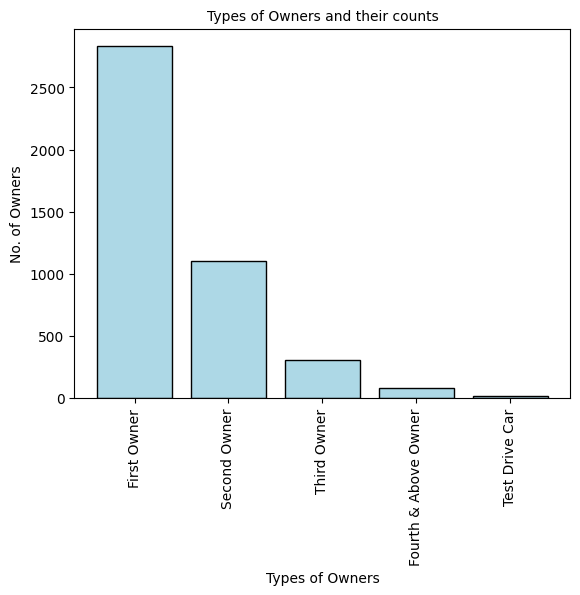

In [149]:
owners = df['owner'].value_counts()
plt.bar(owners.index, owners.values, color = "lightblue", edgecolor = 'black')
#plt.figure(figsize = (5,5))
plt.xticks(rotation = 90)
plt.title("Types of Owners and their counts", fontsize = 10)
plt.xlabel("Types of Owners")
plt.ylabel("No. of Owners")
plt.show()

***This graph shows that types of owners and their counts.***